In [1]:
import sklearn
from sklearn import datasets  # Import datasets module
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn.linear_model import LinearRegression  # Import the LinearRegression class, for example
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load excel sheet which starts with channel_XX ( dynamic channel number)
excel_file = pd.ExcelFile('dv_2022_10_28_10_Zyklen_0_3V_dann_0_15V_Channel_24.xlsx')

# Get the sheet names in the Excel file
sheet_names = excel_file.sheet_names
# Initialize an empty DataFrame to store the data
channel_data = pd.DataFrame()
# Iterate through the sheet names
for sheet_name in sheet_names:
    #Check if the sheet name starts with 'channel'
    if sheet_name.startswith('Channel'):
        # Load the sheet into a DataFrame
        channel_data = excel_file.parse(sheet_name)
#clean emty rows where all the values are NaN
channel_data.dropna(how='all', inplace=True)
channel_data.head()

# create new dataframe with only the relevant columns
data = pd.DataFrame()
data = channel_data[['Step_Time(s)', 'Voltage(V)', 'Current(A)','Cycle_Index']]
data.head()

# Filtering the data for the first charging cycle
def filter_cycle(cycle_number, charging = True):
    cycle_data = data[data['Cycle_Index'] == cycle_number]
    if charging:
        return cycle_data[cycle_data['Current(A)'] > 0]
    return cycle_data[cycle_data['Current(A)'] < 0]

In [49]:
df = filter_cycle(1)



,Step_Time(s),Voltage(V),Current(A),Cycle_Index
362,1.0001,-0.075272,0.004980,1
363,2.0002,-0.051050,0.004980,1
364,3.0006,-0.043088,0.004980,1
365,4.0010,-0.037670,0.004980,1
366,5.0001,-0.033974,0.004980,1
367,6.0011,-0.031089,0.004980,1
368,7.0011,-0.028438,0.004981,1
369,8.0010,-0.026428,0.004981,1
370,9.0003,-0.024599,0.004980,1
371,10.0010,-0.022903,0.004980,1


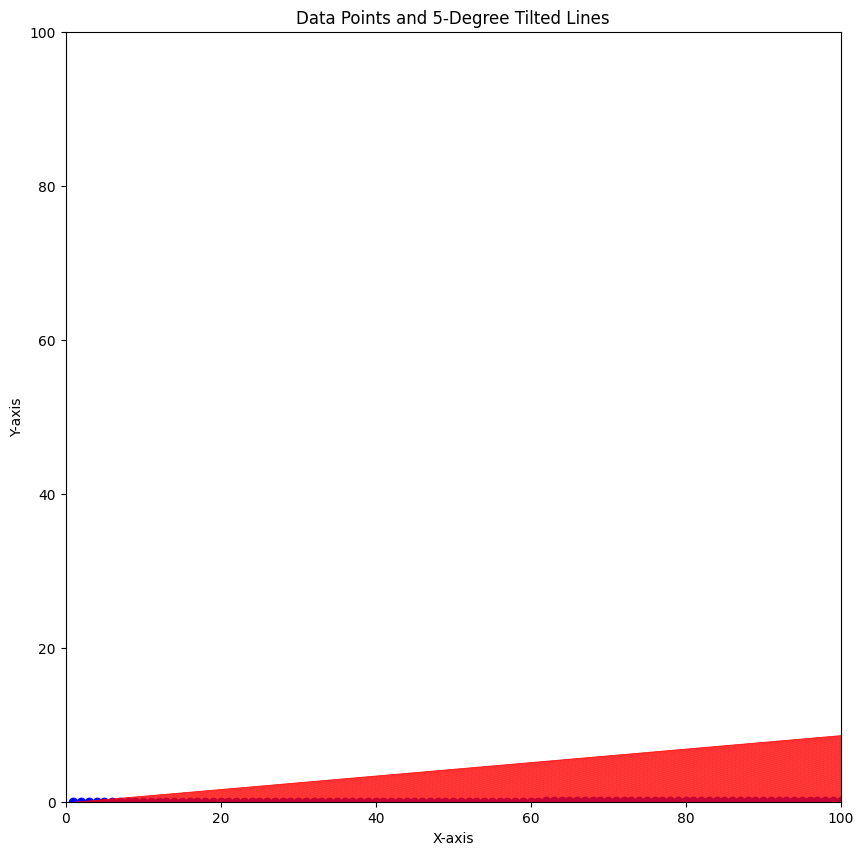

In [47]:
import statsmodels.api as sm
import numpy as np

df = filter_cycle(1)

# Function to calculate y-values of a 5-degree tilted line
def line_y_values(x, x0, y0, angle=5):
    slope = np.tan(np.radians(angle))
    return slope * (x - x0) + y0

# Plotting
plt.figure(figsize=(10, 10))
plt.scatter(df['Step_Time(s)'], df['Voltage(V)'], color='blue')

for index, row in df.iterrows():
    x0, y0 = row['Step_Time(s)'], row['Voltage(V)']
    x_values = np.linspace(0, 100, 500)  # Line from x=0 to x=100
    y_values = line_y_values(x_values, x0, y0)
    plt.plot(x_values, y_values, color='red', linewidth=0.5)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data Points and 5-Degree Tilted Lines')
plt.show()



